# Trees & Spanning trees

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

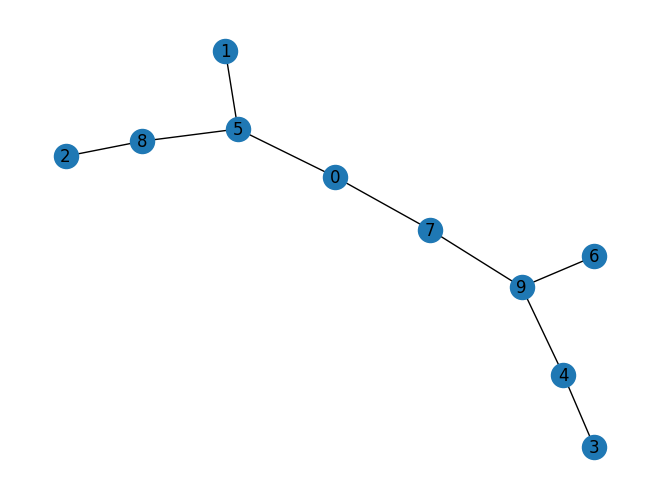

In [2]:
# Generate a random tree with 10 nodes
T = nx.random_tree(10)

# Visualize the tree
nx.draw(T, with_labels=True)
plt.show()


False


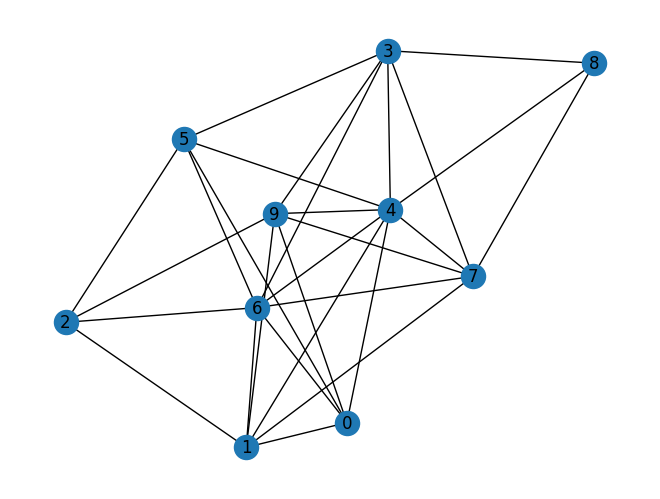

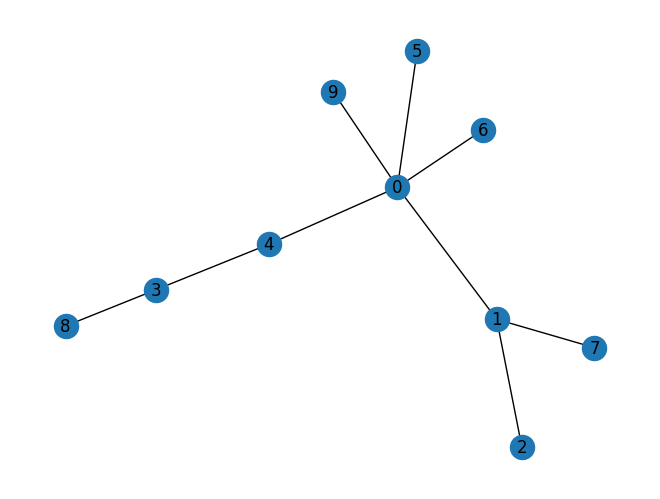

In [3]:
# Create a weighted graph
G = nx.gnp_random_graph(10, 0.5, seed=1, directed=False)

print(nx.is_tree(G))

nx.draw(G, with_labels=True)
plt.show()


# Find minimum spanning tree using Kruskal's
T_kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')

# Visualize the tree
nx.draw(T_kruskal, with_labels=True)
plt.show()

In [4]:
# A simple implementation of Priority Queue
# using Queue.
class PriorityQueue(object):
	def __init__(self):
		self.queue = []

	def __str__(self):
		return ' '.join([str(i) for i in self.queue])

	def __len__(self):
		return len(self.queue)

	# for checking if the queue is empty
	def isEmpty(self):
		return len(self.queue) == 0

	# for inserting an element in the queue
	def add(self, key, value):
		self.queue.append((key, value))

	# for popping an element based on Priority
	def remove_min(self):
		try:
			min_val = 0
			for i in range(len(self.queue)):
				if self.queue[i][0] < self.queue[min_val][0]:
					min_val = i
			item = self.queue[min_val]
			del self.queue[min_val]
			return item
		except IndexError:
			print()
			exit()

In [5]:
class BinTree(nx.DiGraph):
    def __init__(self, value=None, left=None, right=None):
        super().__init__()
        
        # Every node in the tree will have a unique ID
        self.root = self.add_node(value)
        
        if left:
            self.root_left = self.add_node(left.root)
            self.add_edge(self.root, self.root_left)
            
            # Add nodes and edges from the left subtree
            self.add_nodes_from(left.nodes(data=True))
            self.add_edges_from(left.edges())
        
        if right:
            self.root_right = self.add_node(right.root)
            self.add_edge(self.root, self.root_right)
            
            # Add nodes and edges from the right subtree
            self.add_nodes_from(right.nodes(data=True))
            self.add_edges_from(right.edges())
    
    def add_node(self, value):
        """Override the add_node method to use id_counter for unique IDs."""
        super().add_node(value)
        return value


# Test the BinTree class
t1 = BinTree('a')
t2 = BinTree('b')
t = BinTree('ab', t1, t2)
t.nodes(data=True)  # Display nodes with their attributes


NodeDataView({'ab': {}, 'a': {}, 'b': {}})

In [9]:
def huffman(ret):
    # frequency table of characters
    ft = {}
    for c in ret:
        ft[c] = ft.get(c, 0) + 1
    
    # coding    
    q = PriorityQueue()
    for c in set(ret):
        t = BinTree(c)
        q.add(ft[c], t)
    while len(q) > 1:
        f1, t1 = q.remove_min()
        f2, t2 = q.remove_min()
        t = BinTree(f1+f2, t1, t2)
        q.add(f1+f2, t)
    f, t = q.remove_min()
    return t

In [10]:
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

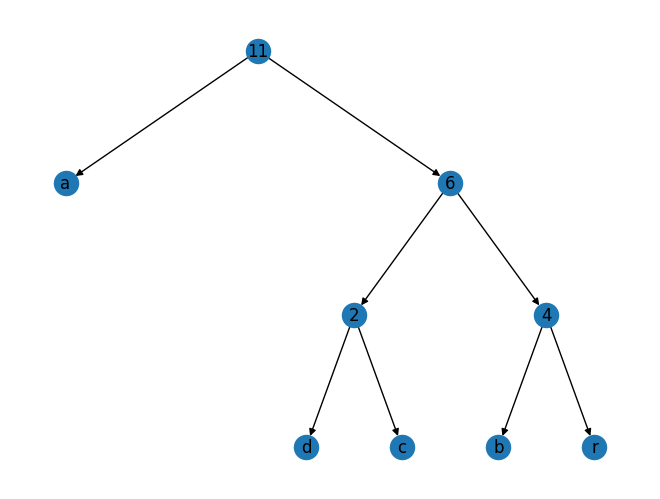

In [11]:
T_huffman = huffman('abracadabra')
pos = hierarchy_pos(T_huffman, T_huffman.root)
nx.draw(T_huffman, with_labels=True, pos=pos)
# tree layout


{(0, 1): Text(0.6060558143623909, 0.47960320146280194, '3'),
 (0, 4): Text(0.2958647041148309, 0.8058190979967871, '9'),
 (1, 3): Text(0.48615741559043424, -0.14362131057843594, '9'),
 (1, 4): Text(0.3600814115128404, 0.41218784830685357, '1'),
 (2, 3): Text(-0.15877285907519104, -0.6866072864648701, '1'),
 (2, 6): Text(-0.5620521403729221, -0.7324359919402925, '7'),
 (3, 5): Text(0.11046927899574058, -0.24210803647110934, '6'),
 (3, 6): Text(-0.10123697187726302, -0.41904327840516276, '3'),
 (4, 7): Text(-0.1544729529852095, 0.49494082694859987, '8'),
 (5, 7): Text(-0.21996997933234308, 0.07023820452194132, '7'),
 (6, 7): Text(-0.4316762302053467, -0.10669703741211206, '6')}

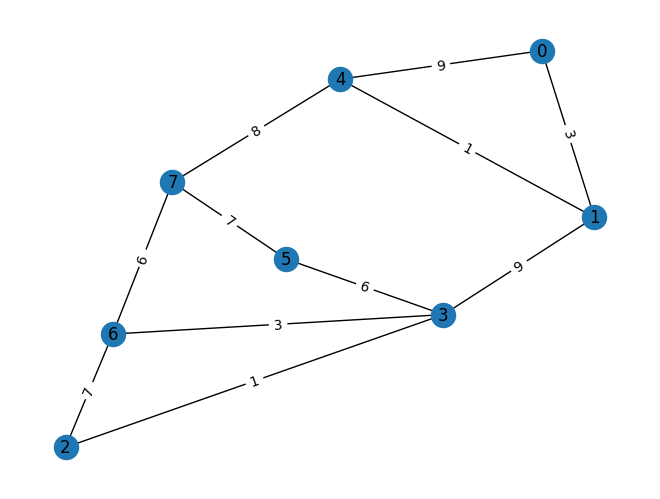

In [25]:
import networkx as nx
import random
# generate random weighted graph
G = nx.gnp_random_graph(8, 0.3, seed=1, directed=False)
for u, v in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

# draw the graph with edge labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# nx.draw(G, with_labels=True)